https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


In [2]:
df = pd.read_csv('../DataSet/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head(2)

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4  7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1  7.6    1  3.9  0.4   

     Classes    
0  not fire     
1  not fire

In [3]:
pd.DataFrame(df.dtypes,columns=['Data Types'])

Data Types
day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object

In [4]:
print('Columns: \n')
df.columns

Columns: 



Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# Data Cleaning

In [5]:
df_Bejaia = df.iloc[:122]     #iloc[initial row:ending row, initial column:ending column]
df_Bejaia.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [6]:
df_Sidi_Bel_Abbes = df.iloc[124:]     #iloc[initial row:ending row, initial column:ending column]
df_Sidi_Bel_Abbes.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
124  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
125  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
126  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   
127  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2  5.6    1   
128  05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8  6.5  0.9   

       Classes    
124  not fire     
125  not fire     
126  not fire     
127  not fire     
128  not fire

In [7]:
df_combined = pd.concat([df_Bejaia,df_Sidi_Bel_Abbes])
df_combined.head(3)

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4  7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1  7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5  7.1  0.3  2.7  0.1   

     Classes    
0  not fire     
1  not fire     
2  not fire

In [8]:
df_combined.columns = df_combined.columns.str.strip()

In [9]:
for col in df_combined.columns:
    #print(col)
    df_combined[col] = df_combined[col].str.strip()

In [10]:
#df_combined.describe(percentiles=[.25, .5, .75],include='all')

df_combined.describe()

day month  year Temperature   RH   Ws Rain  FFMC  DMC   DC  ISI  BUI  \
count   244   244   244         244  244  244  244   244  244  244  244  244   
unique   31     4     1          19   62   18   39   173  166  198  106  174   
top      01    07  2012          35   64   14    0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43  133     8    5    5    8    5   

        FWI Classes  
count   244     243  
unique  126       2  
top     0.4    fire  
freq     12     137

In [11]:
pd.DataFrame(df_combined.dtypes, columns=['Data Types'])

Data Types
day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object

In [12]:
df_combined['Temperature'] = df_combined['Temperature'].astype('int')
df_combined['RH'] = df_combined['RH'].astype(int)
df_combined['Ws'] = df_combined['Ws'].astype(int)
df_combined['Rain'] = df_combined['Rain'].astype(float)
df_combined['FFMC'] = df_combined['FFMC'].astype(float)
df_combined['DMC'] = df_combined['DMC'].astype(float)
#df_combined['DC'] = df_combined['DC'].astype(float)
df_combined['ISI'] = df_combined['ISI'].astype(float)
df_combined['BUI'] = df_combined['BUI'].astype(float)
#df_combined['FWI'] = df_combined['FWI'].astype(float)

In [13]:
df_combined['DC'] = df_combined['DC'].str.replace(r'(\s+)(.*)','',regex=True)
df_combined['DC'] = df_combined['DC'].astype(float)
#df_combined['DC'].unique()

In [14]:
#df_combined['FWI'] = df_combined['FWI'].astype(float)

df_combined[df_combined['FWI']=='fire']

day month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
167  14    07  2012           37  37  18   0.2  88.9  12.9  14.6  12.5  10.4   

      FWI Classes  
167  fire     NaN

In [15]:
condition = df_combined['FWI'] == 'fire'
df_combined.loc[condition,'Classes'] = 'fire'
df_combined.loc[condition,'FWI'] = np.nan
df_combined['FWI'] = df_combined['FWI'].astype(float)

In [16]:
pd.DataFrame(df_combined.dtypes)

0
day           object
month         object
year          object
Temperature    int32
RH             int32
Ws             int32
Rain         float64
FFMC         float64
DMC          float64
DC           float64
ISI          float64
BUI          float64
FWI          float64
Classes       object

# Missing Values

In [17]:
#print('Missing Values:\n')

pd.DataFrame(df_combined.isnull().sum(), columns=['Missing Values'])

Missing Values
day                       0
month                     0
year                      0
Temperature               0
RH                        0
Ws                        0
Rain                      0
FFMC                      0
DMC                       0
DC                        0
ISI                       0
BUI                       0
FWI                       1
Classes                   0

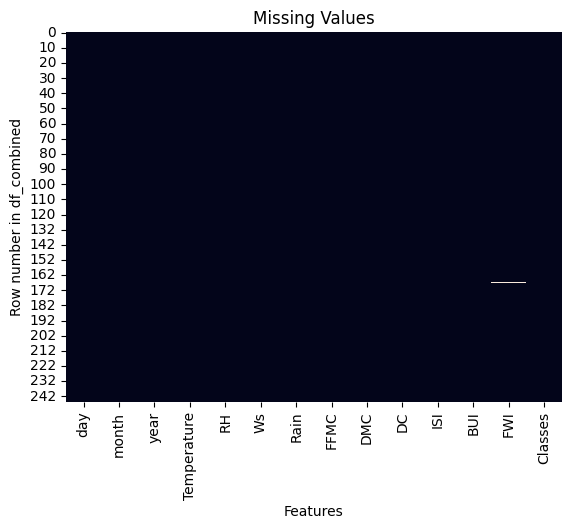

In [18]:
sns.heatmap(data=df_combined.isna(),cbar=False,square=False)
plt.xlabel('Features')
plt.ylabel('Row number in df_combined')
plt.title('Missing Values')
plt.show()

In [19]:
df_combined = df_combined.dropna()

#df_combined.head()

In [20]:
# Exporting Cleaned Dataframe

date = df_combined['day'].astype('str') +'-' + df_combined['month'].astype('str')+'-' + df_combined['year'].astype('str')

date = pd.to_datetime(date,dayfirst=True,yearfirst=False,format="%d-%m-%Y")
df_combined['day'] = df_combined['day'].astype('str')
df_combined['month'] = df_combined['month'].astype('str')
df_combined['year'] = df_combined['year'].astype('str')
df_combined.insert(0,'Date',date)

df_combined.to_csv('DataSet_Clean.csv',encoding='utf-8',date_format='%d-%m-%Y',index=False)
df_combined.drop('Date',axis=1,inplace=True)
#df_combined

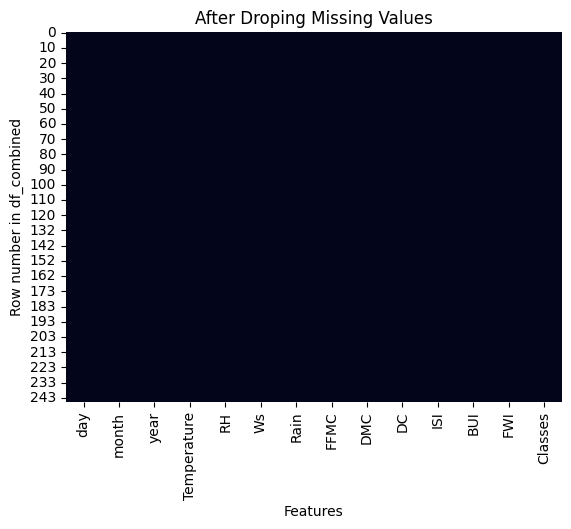

In [21]:
sns.heatmap(data=df_combined.isna(),cbar=False,square=False)
plt.xlabel('Features')
plt.ylabel('Row number in df_combined')
plt.title('After Droping Missing Values')
plt.show()

# Box Plot

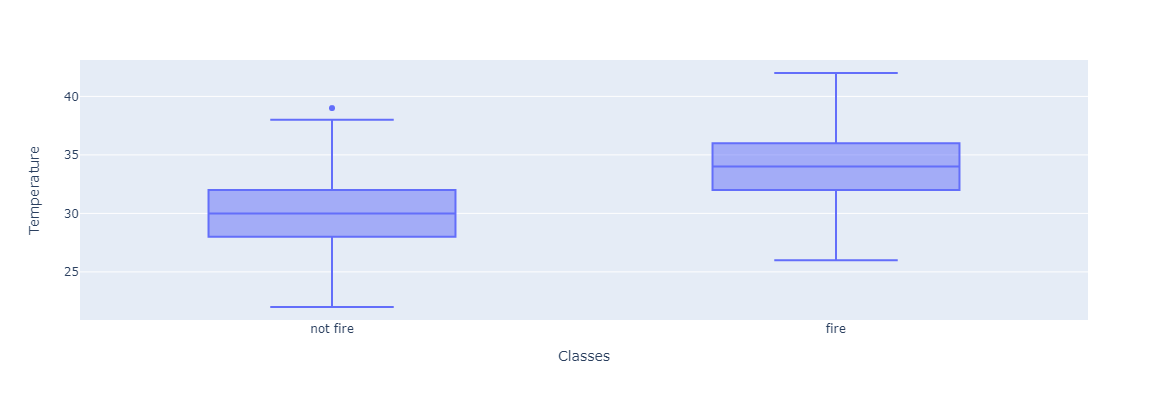

In [22]:
#sns.boxplot(data=df_combined,x='Classes',y='Temperature',hue='month')

px.box(data_frame=df_combined,x='Classes',y='Temperature',height=400,width=400)

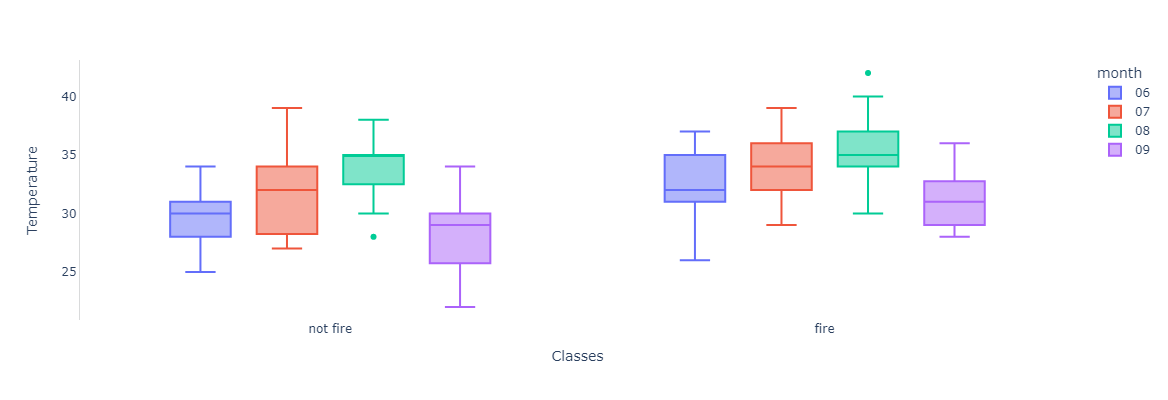

In [23]:
fig = px.box(data_frame=df_combined,x='Classes',y='Temperature',color='month',height=500)
fig.update_layout(height=400,width=1200,showlegend=True,
                  paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)",                  
                 )
fig.update_yaxes(showline=True,showgrid=False,linecolor='#d9dadb')
#fig.update_xaxes(showline=True,showgrid=False,linecolor='#d9dadb')
fig.show()
pio.write_html(fig,file = '../AutoViz_Plots/1.html')

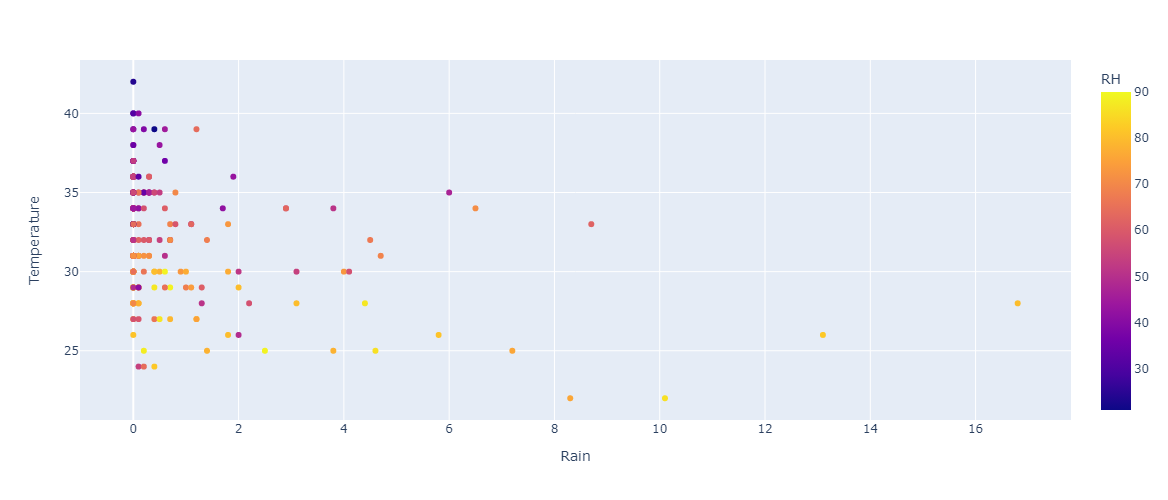

In [24]:
px.scatter(data_frame=df_combined,y='Temperature',x='Rain',color='RH',height=500,width=500)



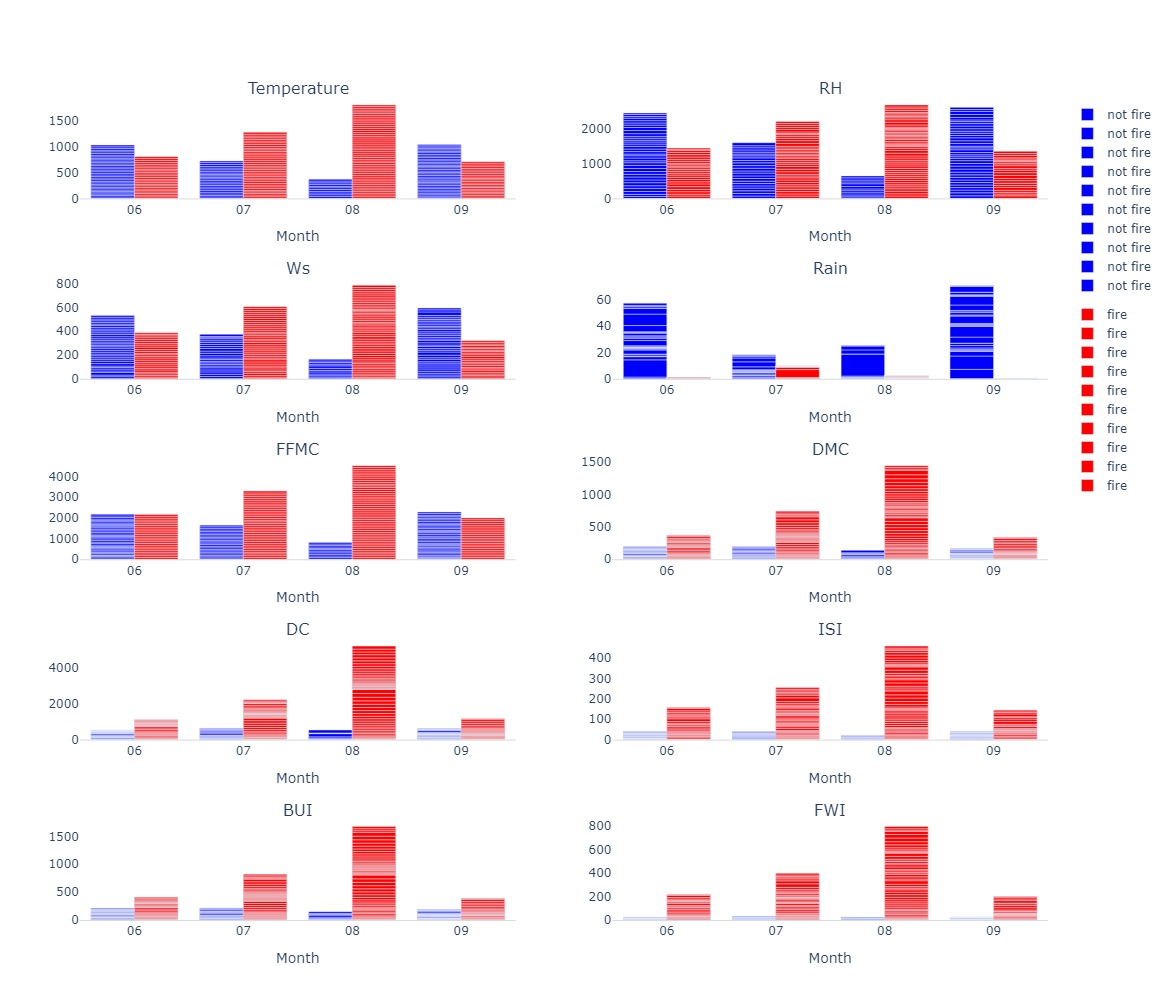

In [25]:
#x_title = fig_dict['layout']['xaxis']['title']['text']
#y_title = fig_dict['layout']['yaxis']['title']['text']



import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff

# Create a sample dataframe
df = df_combined.drop(['Classes','year','day','month'], axis=1)
df2 = df_combined.drop(['Classes','year','day'], axis=1)


# Define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 2

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=df.columns)

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(df.columns):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    
    
    fig.add_trace(px.bar(data_frame=df, x=df_combined['month'],y=df[col_name],color=df_combined['Classes'],color_discrete_sequence=['blue','red']).data[0],row=row_num, col=col_num)
    fig.add_trace(px.bar(data_frame=df, x=df_combined['month'],y=df[col_name],color=df_combined['Classes'],color_discrete_sequence=['blue','red']).data[1],row=row_num, col=col_num)
    
    fig.update_traces(alignmentgroup= True,
                      #offsetgroup = 'fire',
                        #base='relative',                     
                     #hovertemplate = 'Classes=fire<br>month=%{x}<br>DC=%{y}<extra></extra>'
                     )
    
    fig.update_xaxes(title='Month',showgrid=False,linecolor='#d9dadb')
    fig.update_yaxes(showticklabels=True,categoryorder='category ascending',showgrid=False)
    # Set the title of the subplot grid
    fig.update_layout(height=1000,width=1100,showlegend=True,barmode='group',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
fig.show()

############################################
pio.write_html(fig,file = '../AutoViz_Plots/2.html')

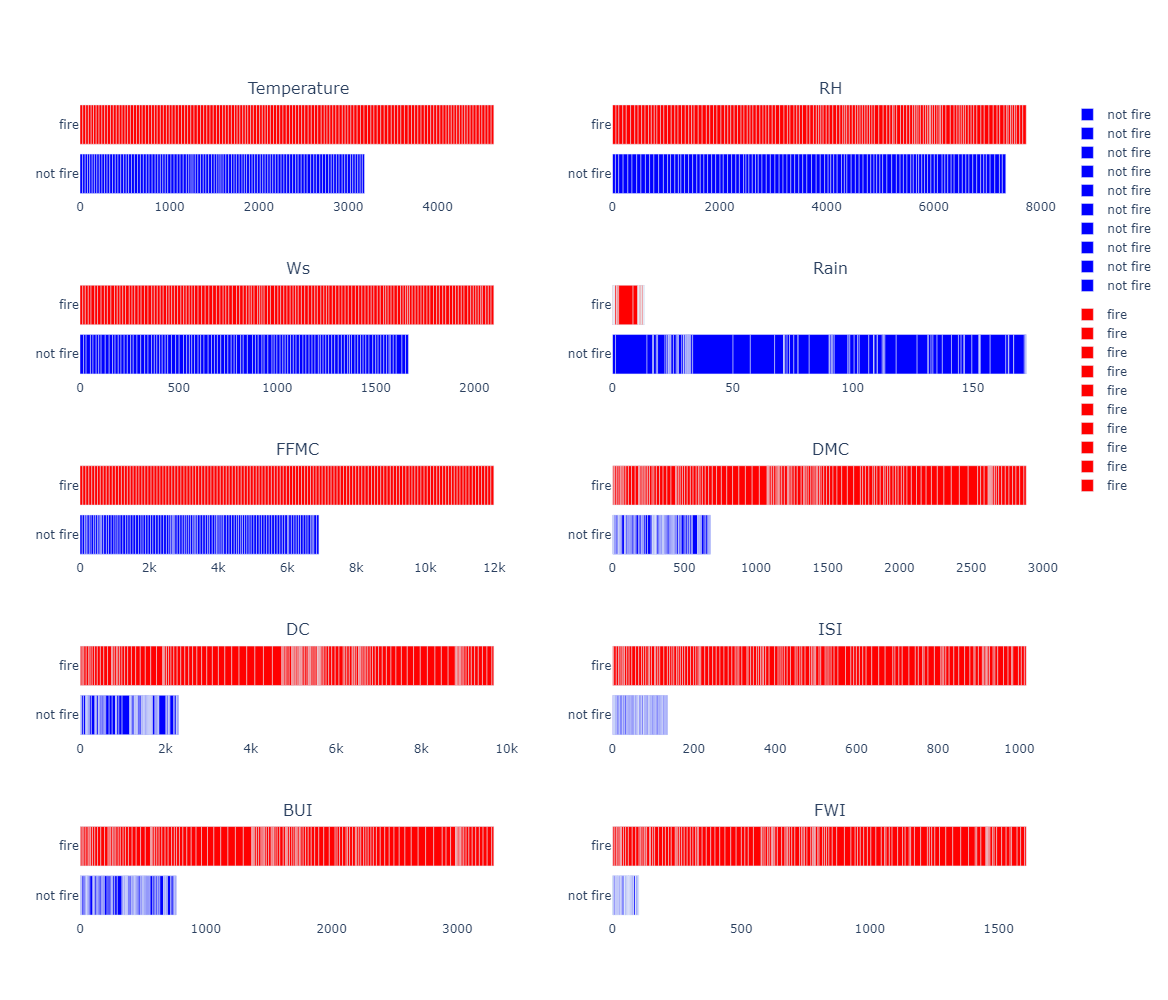

In [26]:

num_rows = 5
num_cols = 2

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=df.columns)

for idx, col_name in enumerate(df.columns):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1


    fig.add_trace(px.bar(data_frame=df, y=df_combined['Classes'],x=df[col_name],color=df_combined['Classes'],color_discrete_sequence=['blue','red']).data[0],row=row_num, col=col_num)
    fig.add_trace(px.bar(data_frame=df, y=df_combined['Classes'],x=df[col_name],color=df_combined['Classes'],color_discrete_sequence=['blue','red']).data[1],row=row_num, col=col_num)
    fig.update_layout(height=1000,width=1100,showlegend=True,barmode='relative',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
 
    
    
# Show the plot
fig.show()
###############
fig.update_layout(height=600,width=1200,showlegend=True,
                  paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)",                  
                 )
fig.update_yaxes(showline=True,showgrid=False,linecolor='#d9dadb')
fig.update_xaxes(showline=False,showgrid=False)
#plt.tight_layout()
#############################
pio.write_html(fig,file = '../AutoViz_Plots/3.html')


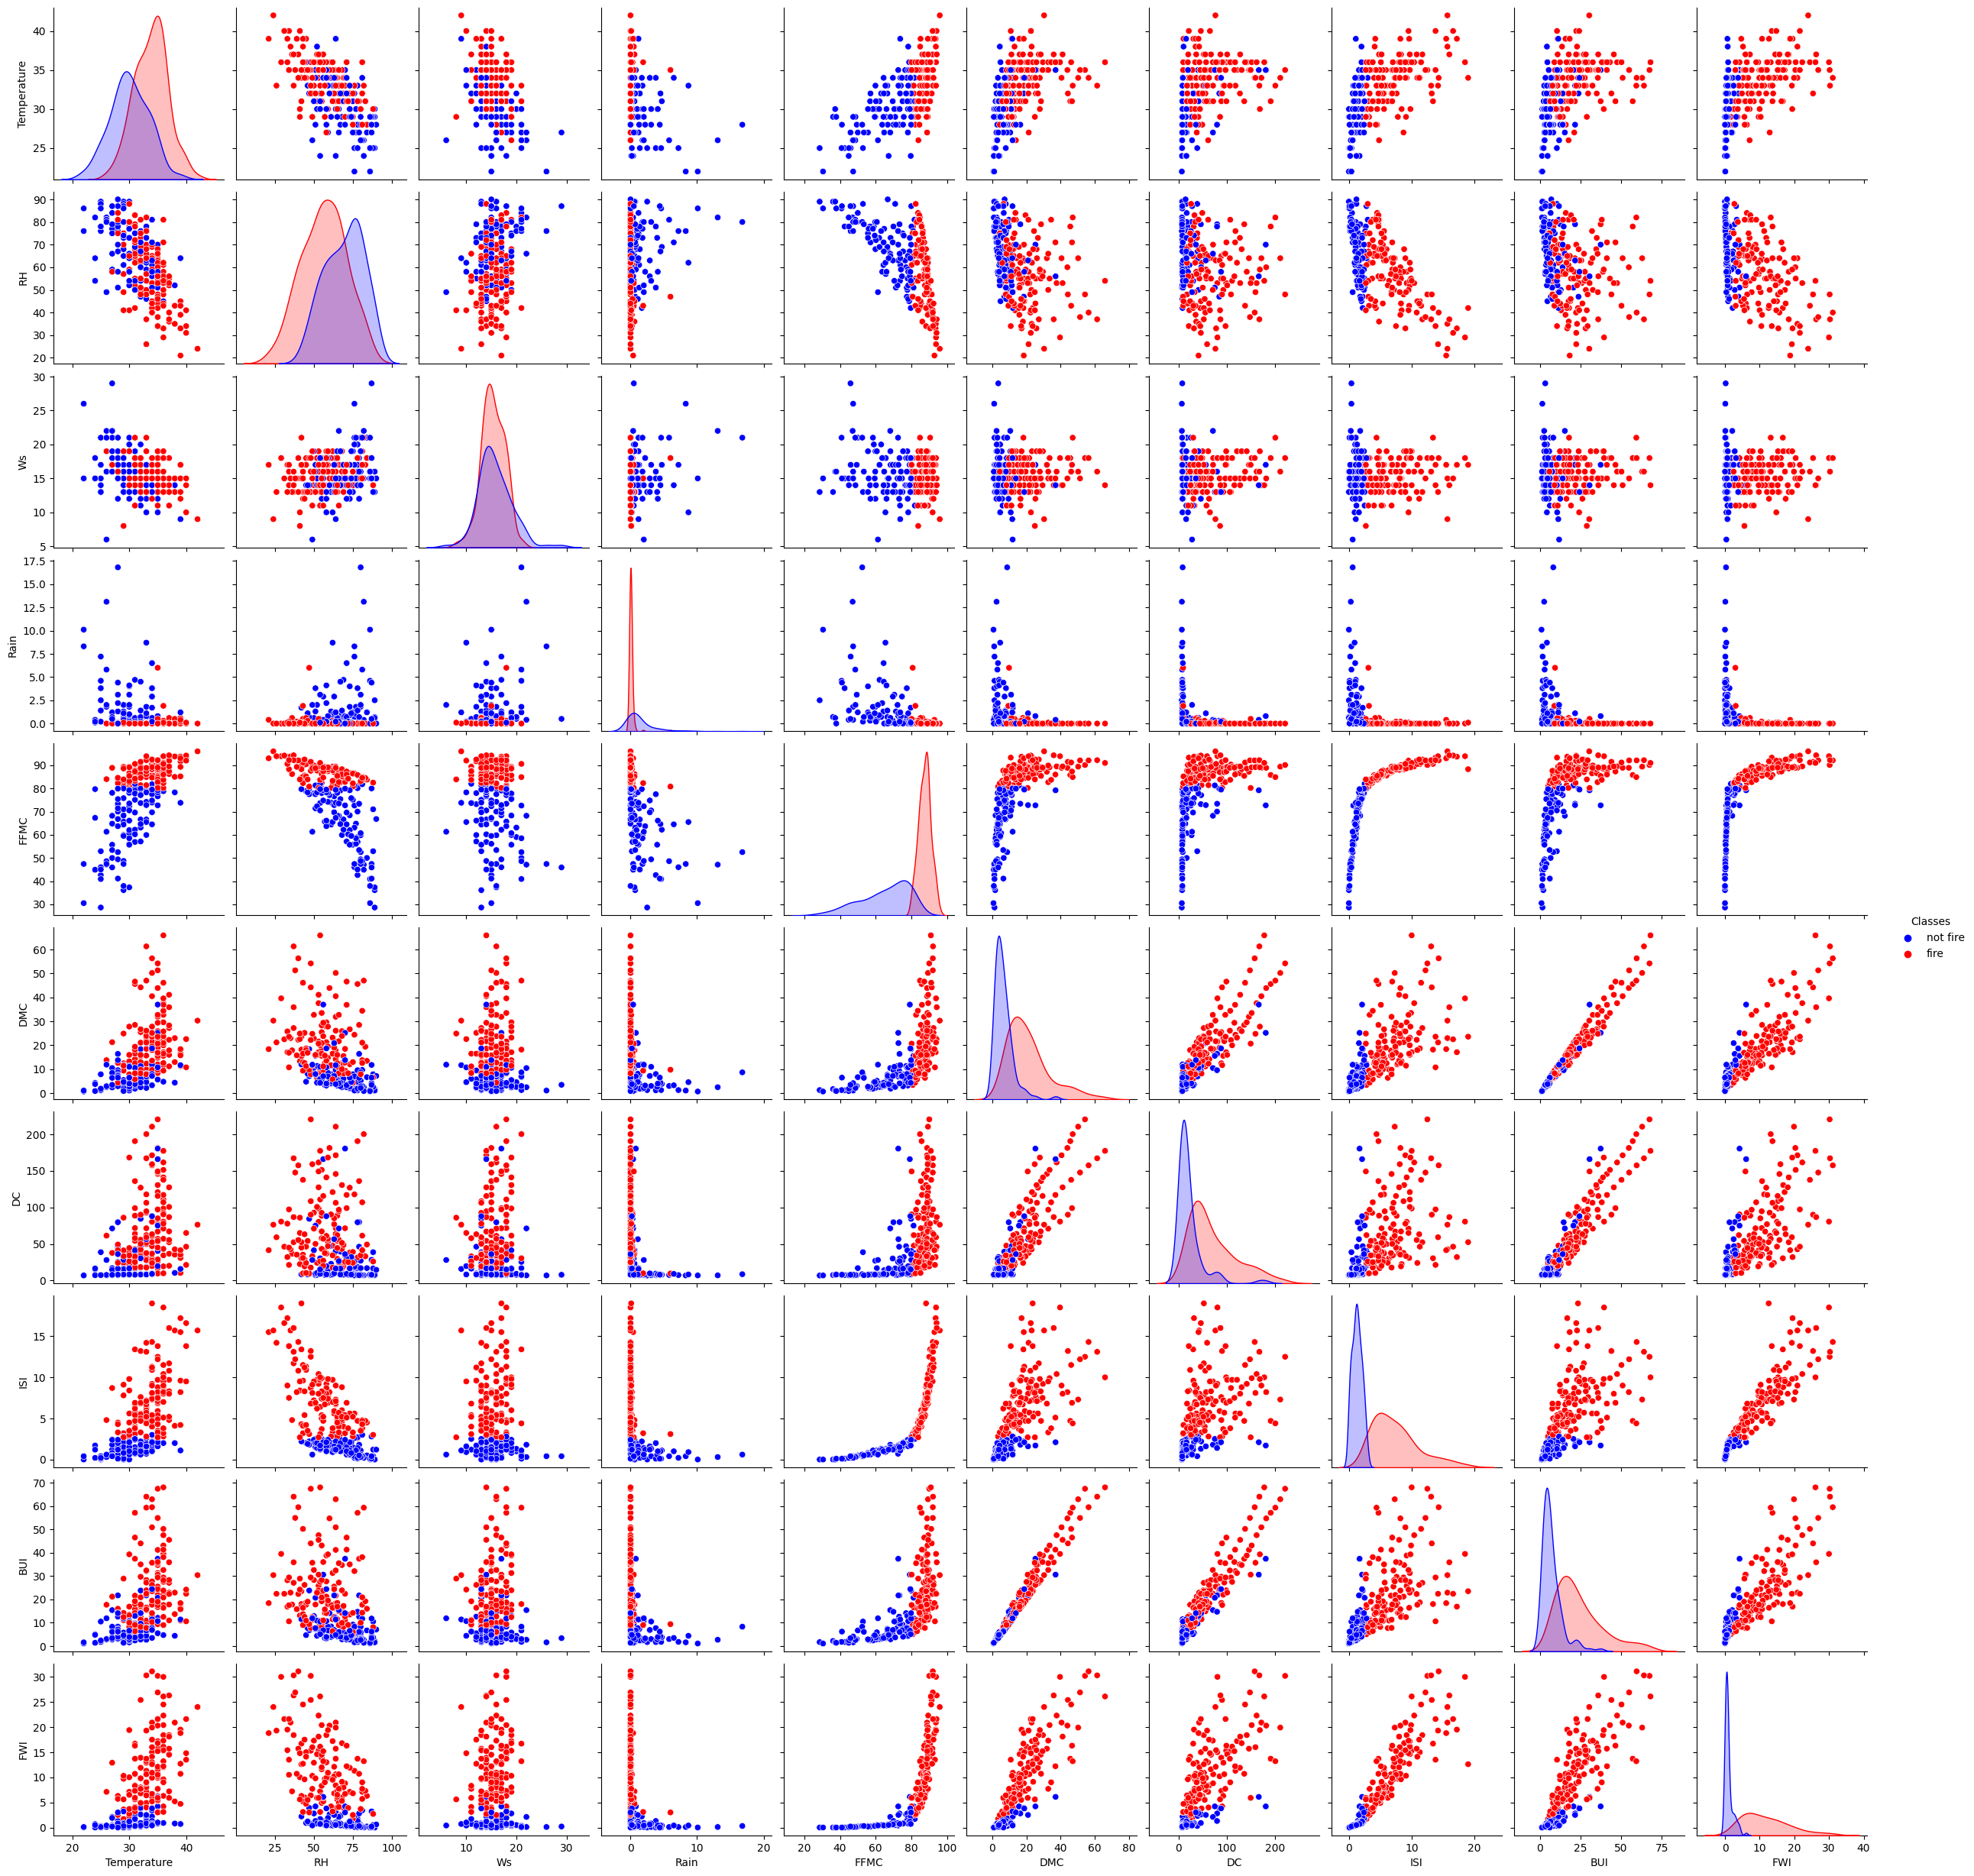

In [27]:
fig = sns.pairplot(data=df_combined,hue='Classes',height=2.5,aspect=1,palette={"not fire": "blue", "fire": "red"})

######################
fig.figure.savefig('../AutoViz_Plots/4.svg',transparent=True,dpi=400)
plt.show()

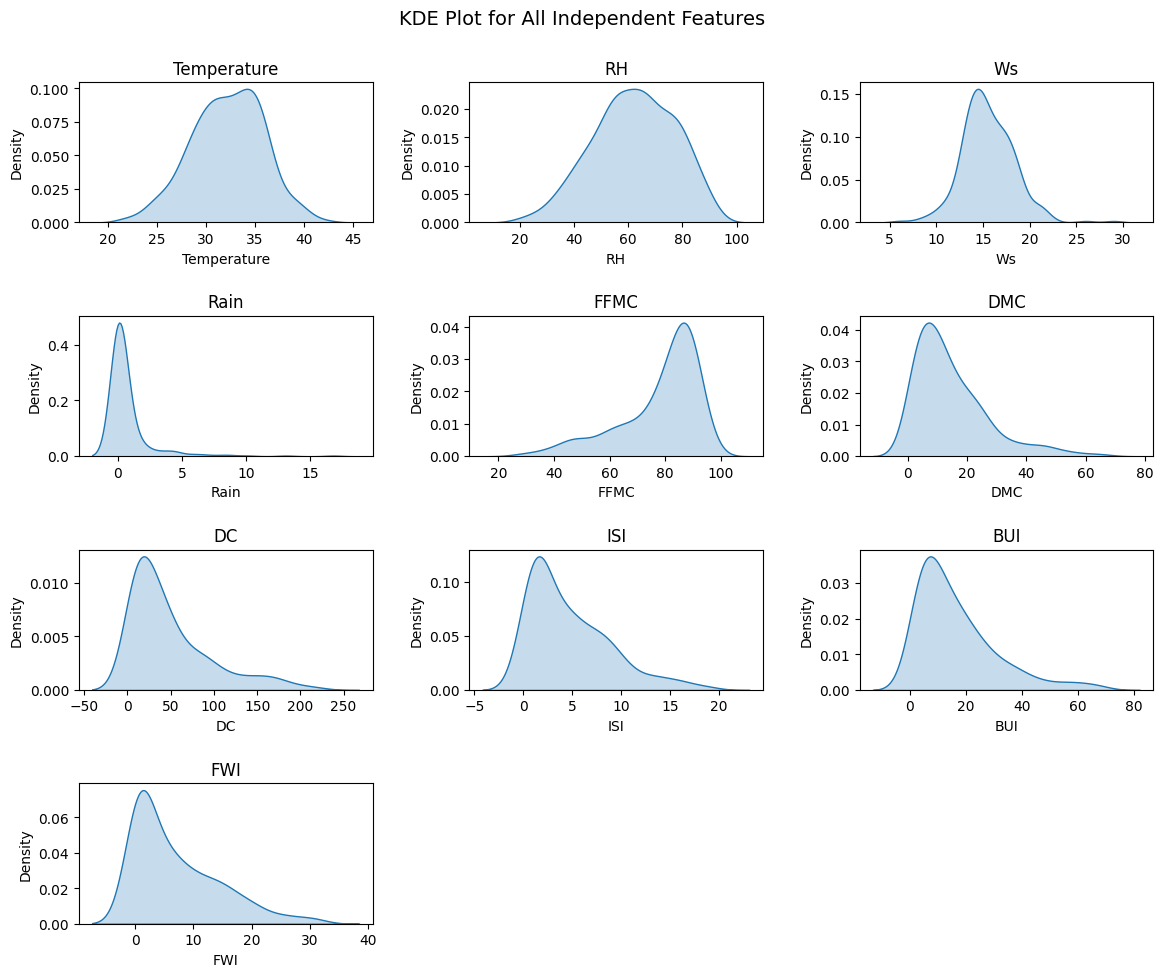

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe
df = df_combined.drop(['day','month','year','Classes'],axis=1)
# create figure and axes objects
fig, axes = plt.subplots(nrows=5, ncols=3, squeeze=True,figsize=(12, 12))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for All Independent Features', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()

#############################################
fig.figure.savefig('../AutoViz_Plots/5.svg',transparent=True,dpi=300)


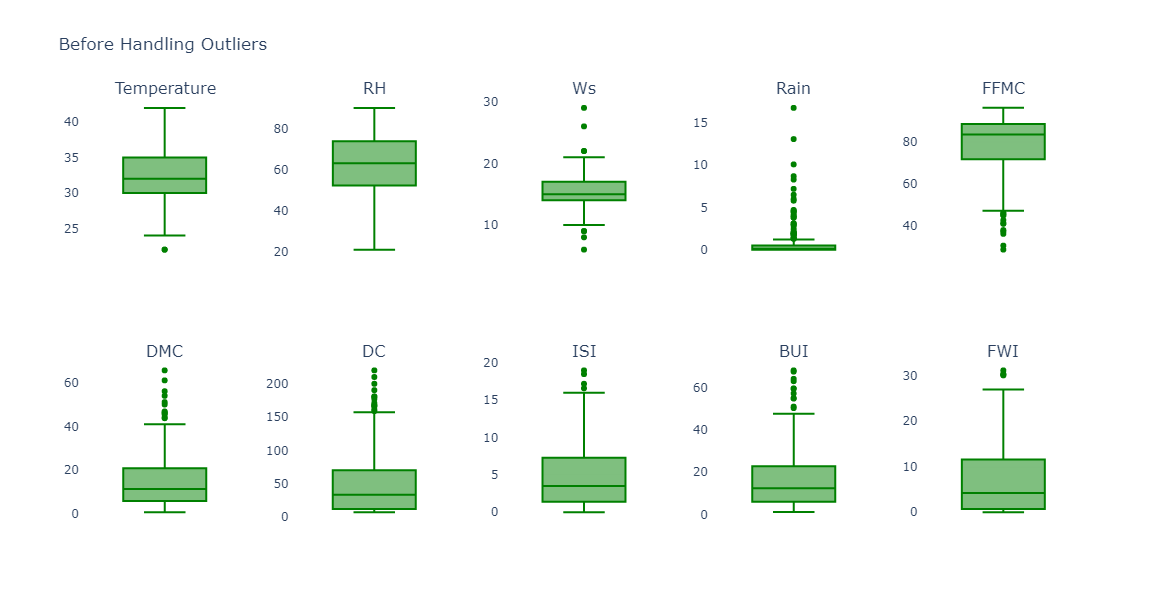

In [29]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Create a sample dataframe
df = df_combined.drop(['day','month','year','Classes'],axis=1)

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 5

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=df.columns)

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(df.columns):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    fig.add_trace(px.box(df, y=col_name).data[0], row=row_num, col=col_num,)

    # Set the title of the subplot grid
    fig.update_layout(height=600,width=900, title='Before Handling Outliers',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",                  
                     )
    fig.update_traces(marker_color='green')
# Show the plot
fig.show()
###############################
fig.update_yaxes(showline=False,showgrid=False)
fig.update_xaxes(showline=False,showgrid=False)
##########################################
pio.write_html(fig,file = '../AutoViz_Plots/6.html')

# Outliers Detections And Removal

In [30]:
def outliers_fence(col):
    Q1 = df_combined[col].quantile(q=0.25)
    Q3 = df_combined[col].quantile(q=0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    return lower_fence, upper_fence


#def outliers_fence_rain():
#    Q1 = df_combined['Rain'].quantile(q=0.25)
#    Q3 = df_combined['Rain'].quantile(q=0.75)
#    IQR = Q3 - Q1

#    lower_fence = Q1 - 1.5*IQR
#    upper_fence = Q3 + 1.5*IQR
#    return lower_fence, upper_fence

In [31]:
lower_fence1, upper_fence1 = outliers_fence(col='DMC')
lower_fence2, upper_fence2 = outliers_fence(col='Rain')
lower_fence3, upper_fence3 = outliers_fence(col='FFMC')
lower_fence4, upper_fence4 = outliers_fence(col='BUI')
lower_fence5, upper_fence5 = outliers_fence(col='DC')


#outliers = df_combined[(df_combined['Rain'] < lower_fence) | (df_combined['Rain'] > upper_fence)]
    
df_combined2 = df_combined[(df_combined['DMC'] >= lower_fence1) & (df_combined['DMC'] <= upper_fence1)]
df_combined2 = df_combined2[(df_combined2['Rain'] >= lower_fence2) & (df_combined2['Rain'] <= upper_fence2)]
df_combined2 = df_combined2[(df_combined2['FFMC'] >= lower_fence3) & (df_combined2['FFMC'] <= upper_fence3)]
df_combined2 = df_combined2[(df_combined2['BUI'] >= lower_fence4) & (df_combined2['BUI'] <= upper_fence4)]
df_combined2 = df_combined2[(df_combined2['DC'] >= lower_fence5) & (df_combined2['DC'] <= upper_fence5)]
df_for_regenration= df_combined2.copy();

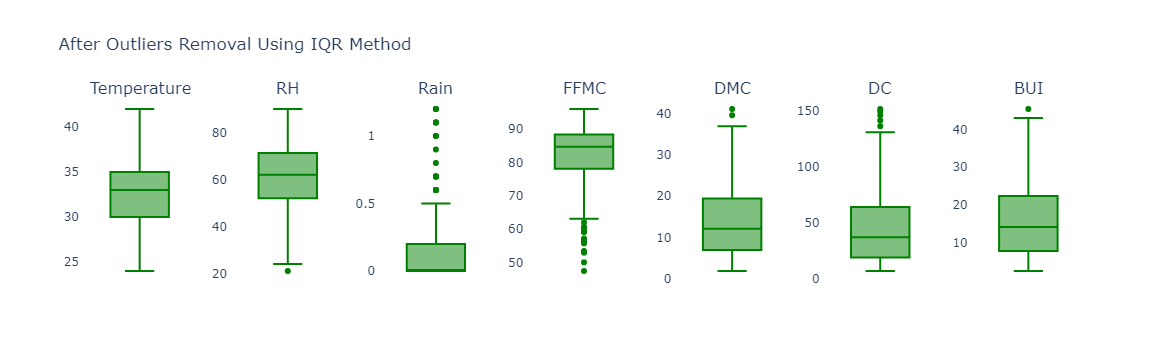

In [32]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import pandas as pd

# Create a sample dataframe
df = df_combined2.drop(['day','month','year','Classes','Ws', 'ISI','FWI'],axis=1)

# Define the number of rows and columns for the subplot grid
num_rows = 1
num_cols = 7

# Create a subplot grid with the specified number of rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols,subplot_titles=df.columns)

# Loop through each column in the dataframe and add a box plot to the subplot grid
for idx, col_name in enumerate(df.columns):
    row_num = (idx // num_cols) + 1
    col_num = (idx % num_cols) + 1
    fig.add_trace(px.box(df, y=col_name).data[0], row=row_num, col=col_num)

    # Set the title of the subplot grid
    fig.update_layout(height=350,width=1100, title= 'After Outliers Removal Using IQR Method',
                      paper_bgcolor = "rgba(0,0,0,0)",
                      plot_bgcolor = "rgba(0,0,0,0)",
                     )
fig.update_traces(marker_color='green')
# Show the plot
fig.show()

pio.write_html(fig,file = '../AutoViz_Plots/7.html')

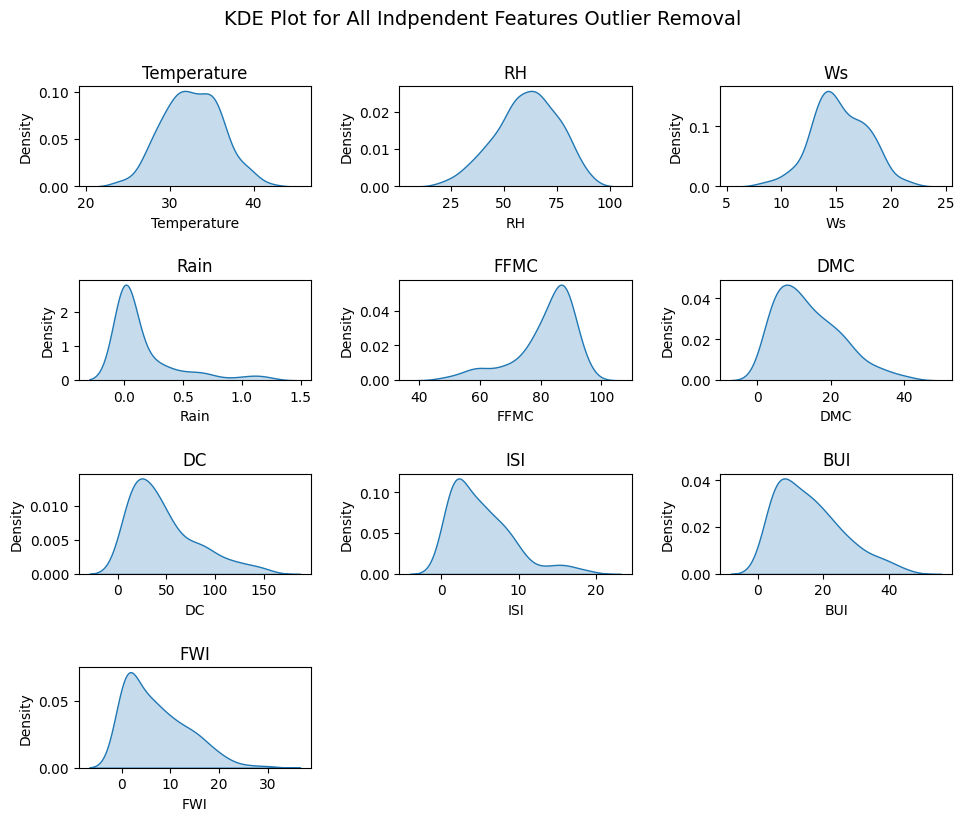

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe
df =df_combined2.drop(['day','month','year','Classes'],axis=1)
# create figure and axes objects
fig, axes = plt.subplots(nrows=5, ncols=3, squeeze=True,figsize=(10, 10))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for All Indpendent Features Outlier Removal', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()

##############################################
#fig.figure.savefig('../AutoViz_Plots/8.svg',transparent=True,)

# Associationa and Independence Chi Square Test

In [34]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import os

In [35]:
alpha= 0.05
CI = 0.95
outputs = []

#################### CLEANING THE FILE ################################
try:
    with open('../AutoViz_Plots/Chi2Test/Chi2Test_for_associaion.html', 'w') as file:
        file.write('')
except:
    pass
######################################################
for col in df_combined.drop(['Classes'],axis=1).columns:

    observed_freq = pd.crosstab(df_combined['Classes'],df_combined[col])
    chi2_stat, p_value, dof,expected_freq = chi2_contingency(observed = observed_freq,correction=True)
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    
    if chi2_stat>=critical_value:
        print(f"Reject H0 at CI {CI}, p-value {round(p_value,4)}, critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is a relationship between {'Classes'.upper()} and {col.upper()} variables \n")
        output = f"Reject H0 at CI {CI}, p-value {round(p_value,4)}, critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is a relationship between {'Classes'.upper()} and {col.upper()} variables \n"
    else:
        print(f"Retain H0 at CI {CI}, p-value {round(p_value,4)} and critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is no relationship between {'Classes'.upper()} and {col.upper()} variables \n")
        output = f"Retain H0 at CI {CI}, p-value {round(p_value,4)} and critical value {round(critical_value,4)} and chi2_stat {round(chi2_stat,4)}:\nThere is no relationship between {'Classes'.upper()} and {col.upper()} variables \n"
    
    outputs.append(output)

# Write the outputs to the file
if not os.path.exists(f'../AutoViz_Plots/9_1_Chi2Test'):
    os.makedirs(f'../AutoViz_Plots/9_1_Chi2Test')
    
with open('../AutoViz_Plots/9_1_Chi2Test/9_1_Chi2Test_for_associaion.html','a') as file:
    file.write("<h1>Chi2 Test for Association/ Independence Detection</h1>")
    for output in outputs:
        file.write(f"<p  style='text-align: justify; margin-left=50px'>{output}\n</p>")
        

Retain H0 at CI 0.95, p-value 0.3577 and critical value 43.773 and chi2_stat 32.2124:
There is no relationship between CLASSES and DAY variables 

Reject H0 at CI 0.95, p-value 0.0, critical value 7.8147 and chi2_stat 30.9777:
There is a relationship between CLASSES and MONTH variables 

Retain H0 at CI 0.95, p-value 1.0 and critical value nan and chi2_stat 0.0:
There is no relationship between CLASSES and YEAR variables 

Reject H0 at CI 0.95, p-value 0.0, critical value 28.8693 and chi2_stat 73.5415:
There is a relationship between CLASSES and TEMPERATURE variables 

Reject H0 at CI 0.95, p-value 0.0348, critical value 80.2321 and chi2_stat 82.5022:
There is a relationship between CLASSES and RH variables 

Retain H0 at CI 0.95, p-value 0.3124 and critical value 27.5871 and chi2_stat 19.2858:
There is no relationship between CLASSES and WS variables 

Reject H0 at CI 0.95, p-value 0.0, critical value 53.3835 and chi2_stat 125.9923:
There is a relationship between CLASSES and RAIN var

# Correlation

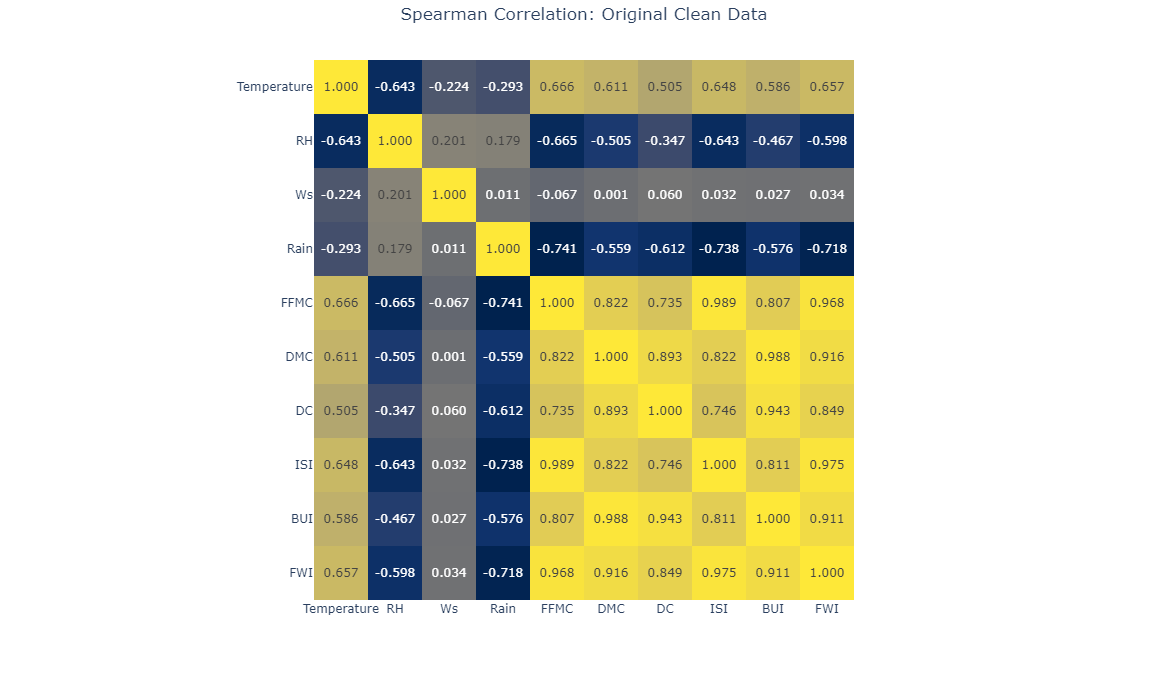

In [36]:
fig = px.imshow(df_combined.corr(method='spearman',numeric_only=True),text_auto='.3f',color_continuous_scale='Cividis',
          title='Spearman Correlation: Original Clean Data')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=40,pad=0),
                  title_x=0.5,
                  height=700,width=700,
                  paper_bgcolor = "rgba(0,0,0,0)",
                plot_bgcolor = "rgba(0,0,0,0)",                  
                margin_autoexpand=True,
                  font=dict(size = 12)                 
                
                )

fig.update_yaxes(automargin=False)


fig.show()
#############################
pio.write_html(fig,file = '../AutoViz_Plots/9.html')

# Feature Selection

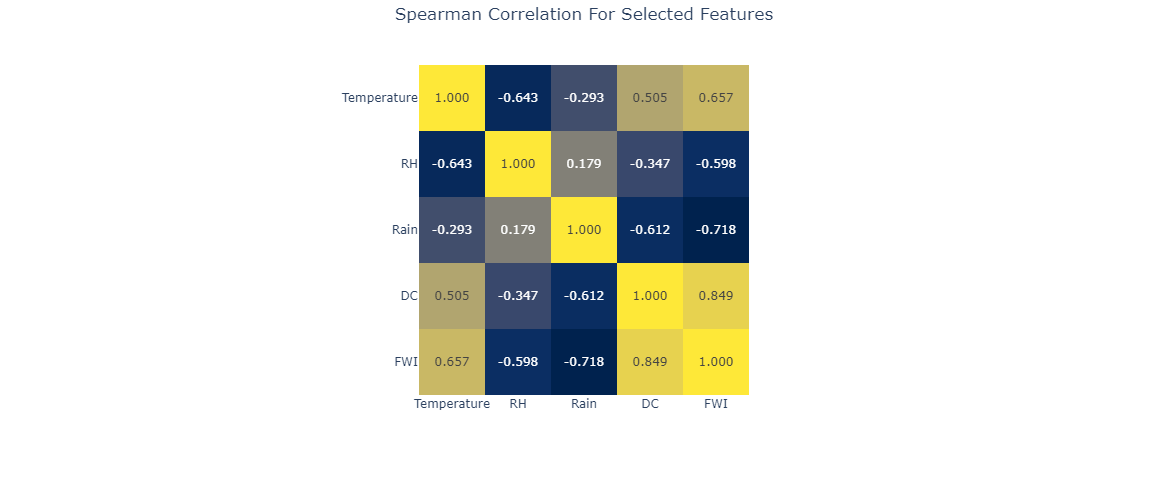

In [37]:
# FWI is calculated from FFMC, DMC and ISI and is the world wide accepted indx for fire prediction

#f = ['Ws','day','year','FWI']
f = ['Ws','day','year','BUI','ISI','FFMC','DMC']
df_combined_selected = df_combined.drop(f,axis=1)

######################################################

fig = px.imshow(df_combined_selected.corr(method='spearman',numeric_only=True),text_auto='.3f',color_continuous_scale='Cividis',
          title='Spearman Correlation For Selected Features')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=40,pad=0),
                  title_x=0.5,
                  height=500,width=500,
                  paper_bgcolor = "rgba(0,0,0,0)",
                    plot_bgcolor = "rgba(0,0,0,0)",                  
                    margin_autoexpand=True,
                    font=dict(size = 12))

fig.update_yaxes(automargin=True)


fig.show()
#######################
#pio.write_html(fig,file = '../AutoViz_Plots/10.html')

In [38]:
df_combined_selected.head(3)

month  Temperature  RH  Rain   DC  FWI   Classes
0    06           29  57   0.0  7.6  0.5  not fire
1    06           29  61   1.3  7.6  0.4  not fire
2    06           26  82  13.1  7.1  0.1  not fire

# Feature Creation

In [39]:
df_feature = df_combined.copy()

In [40]:
df_feature['FWI/FFMC'] = df_feature['FWI']/df_feature['FFMC']
df_feature['(DMC/FWI)/ISI'] = (df_feature['FWI']/df_feature['DMC'])/df_feature['ISI']
#df_feature['ISI/FWI'] = df_feature['ISI']/df_feature['FWI']
df_feature['FWI/BUI'] = df_feature['FWI']/df_feature['BUI']


df_feature.head()

day month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2  03    06  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4  05    06  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

    Classes  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  
0  not fire  0.007610       0.113122  0.147059  
1  not fire  0.006211       0.097561  0.102564  
2  not fire  0.002123       0.133333  0.037037  
3  not fire  0.000000            NaN  0.000000  
4  not fire  0.007716       0.138889  0.128205

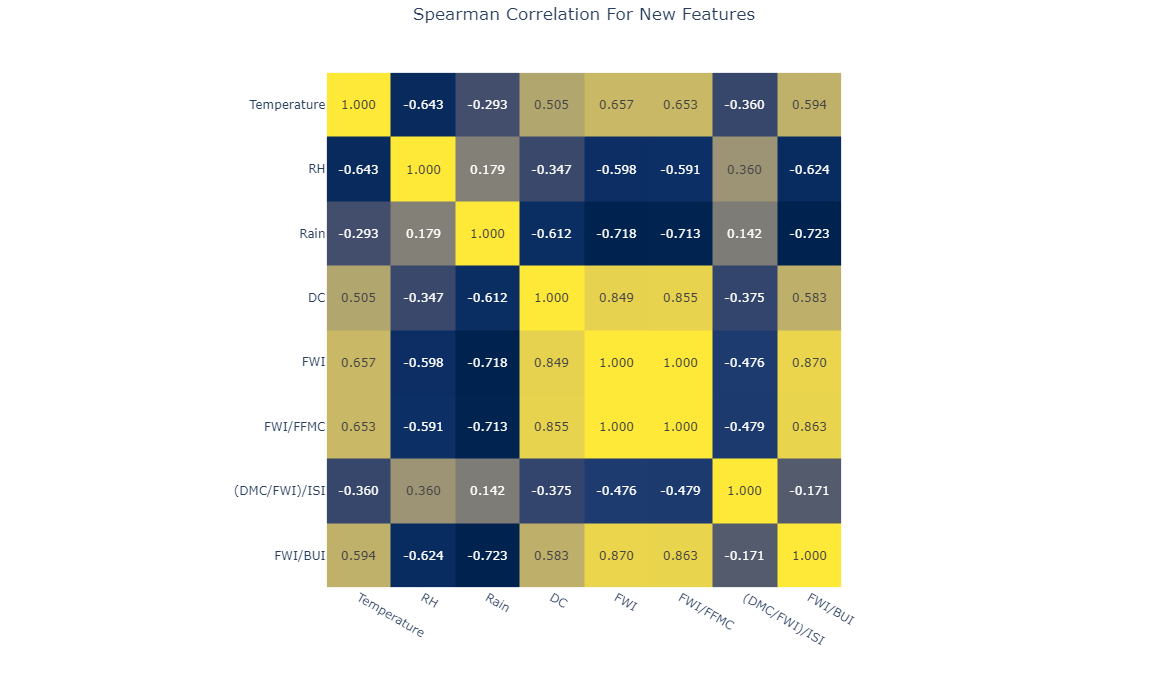

In [41]:
# FWI is calculated from FFMC, DMC and ISI and is the world wide accepted indx for fire prediction

#f = ['Ws','day','year','FWI']
f = ['Ws','day','year','BUI','ISI','FFMC','DMC','Classes','month']
df_feature_eng = df_feature.drop(f,axis=1)

######################################################

fig = px.imshow(df_feature_eng.corr(method='spearman',numeric_only=True),text_auto='.3f',color_continuous_scale='Cividis',
          title='Spearman Correlation For New Features')
fig.update_coloraxes(showscale=False)
fig.update_layout(margin=dict(t=40,pad=0),
                  title_x=0.5,
                  height=700,width=700,
                  paper_bgcolor = "rgba(0,0,0,0)",
                    plot_bgcolor = "rgba(0,0,0,0)",                  
                    margin_autoexpand=True,
                    font=dict(size = 12))

fig.update_yaxes(automargin=True)


fig.show()
#######################
#pio.write_html(fig,file = '../AutoViz_Plots/10_1.html')

In [42]:
df_feature_eng.dtypes

Temperature        int32
RH                 int32
Rain             float64
DC               float64
FWI              float64
FWI/FFMC         float64
(DMC/FWI)/ISI    float64
FWI/BUI          float64
dtype: object

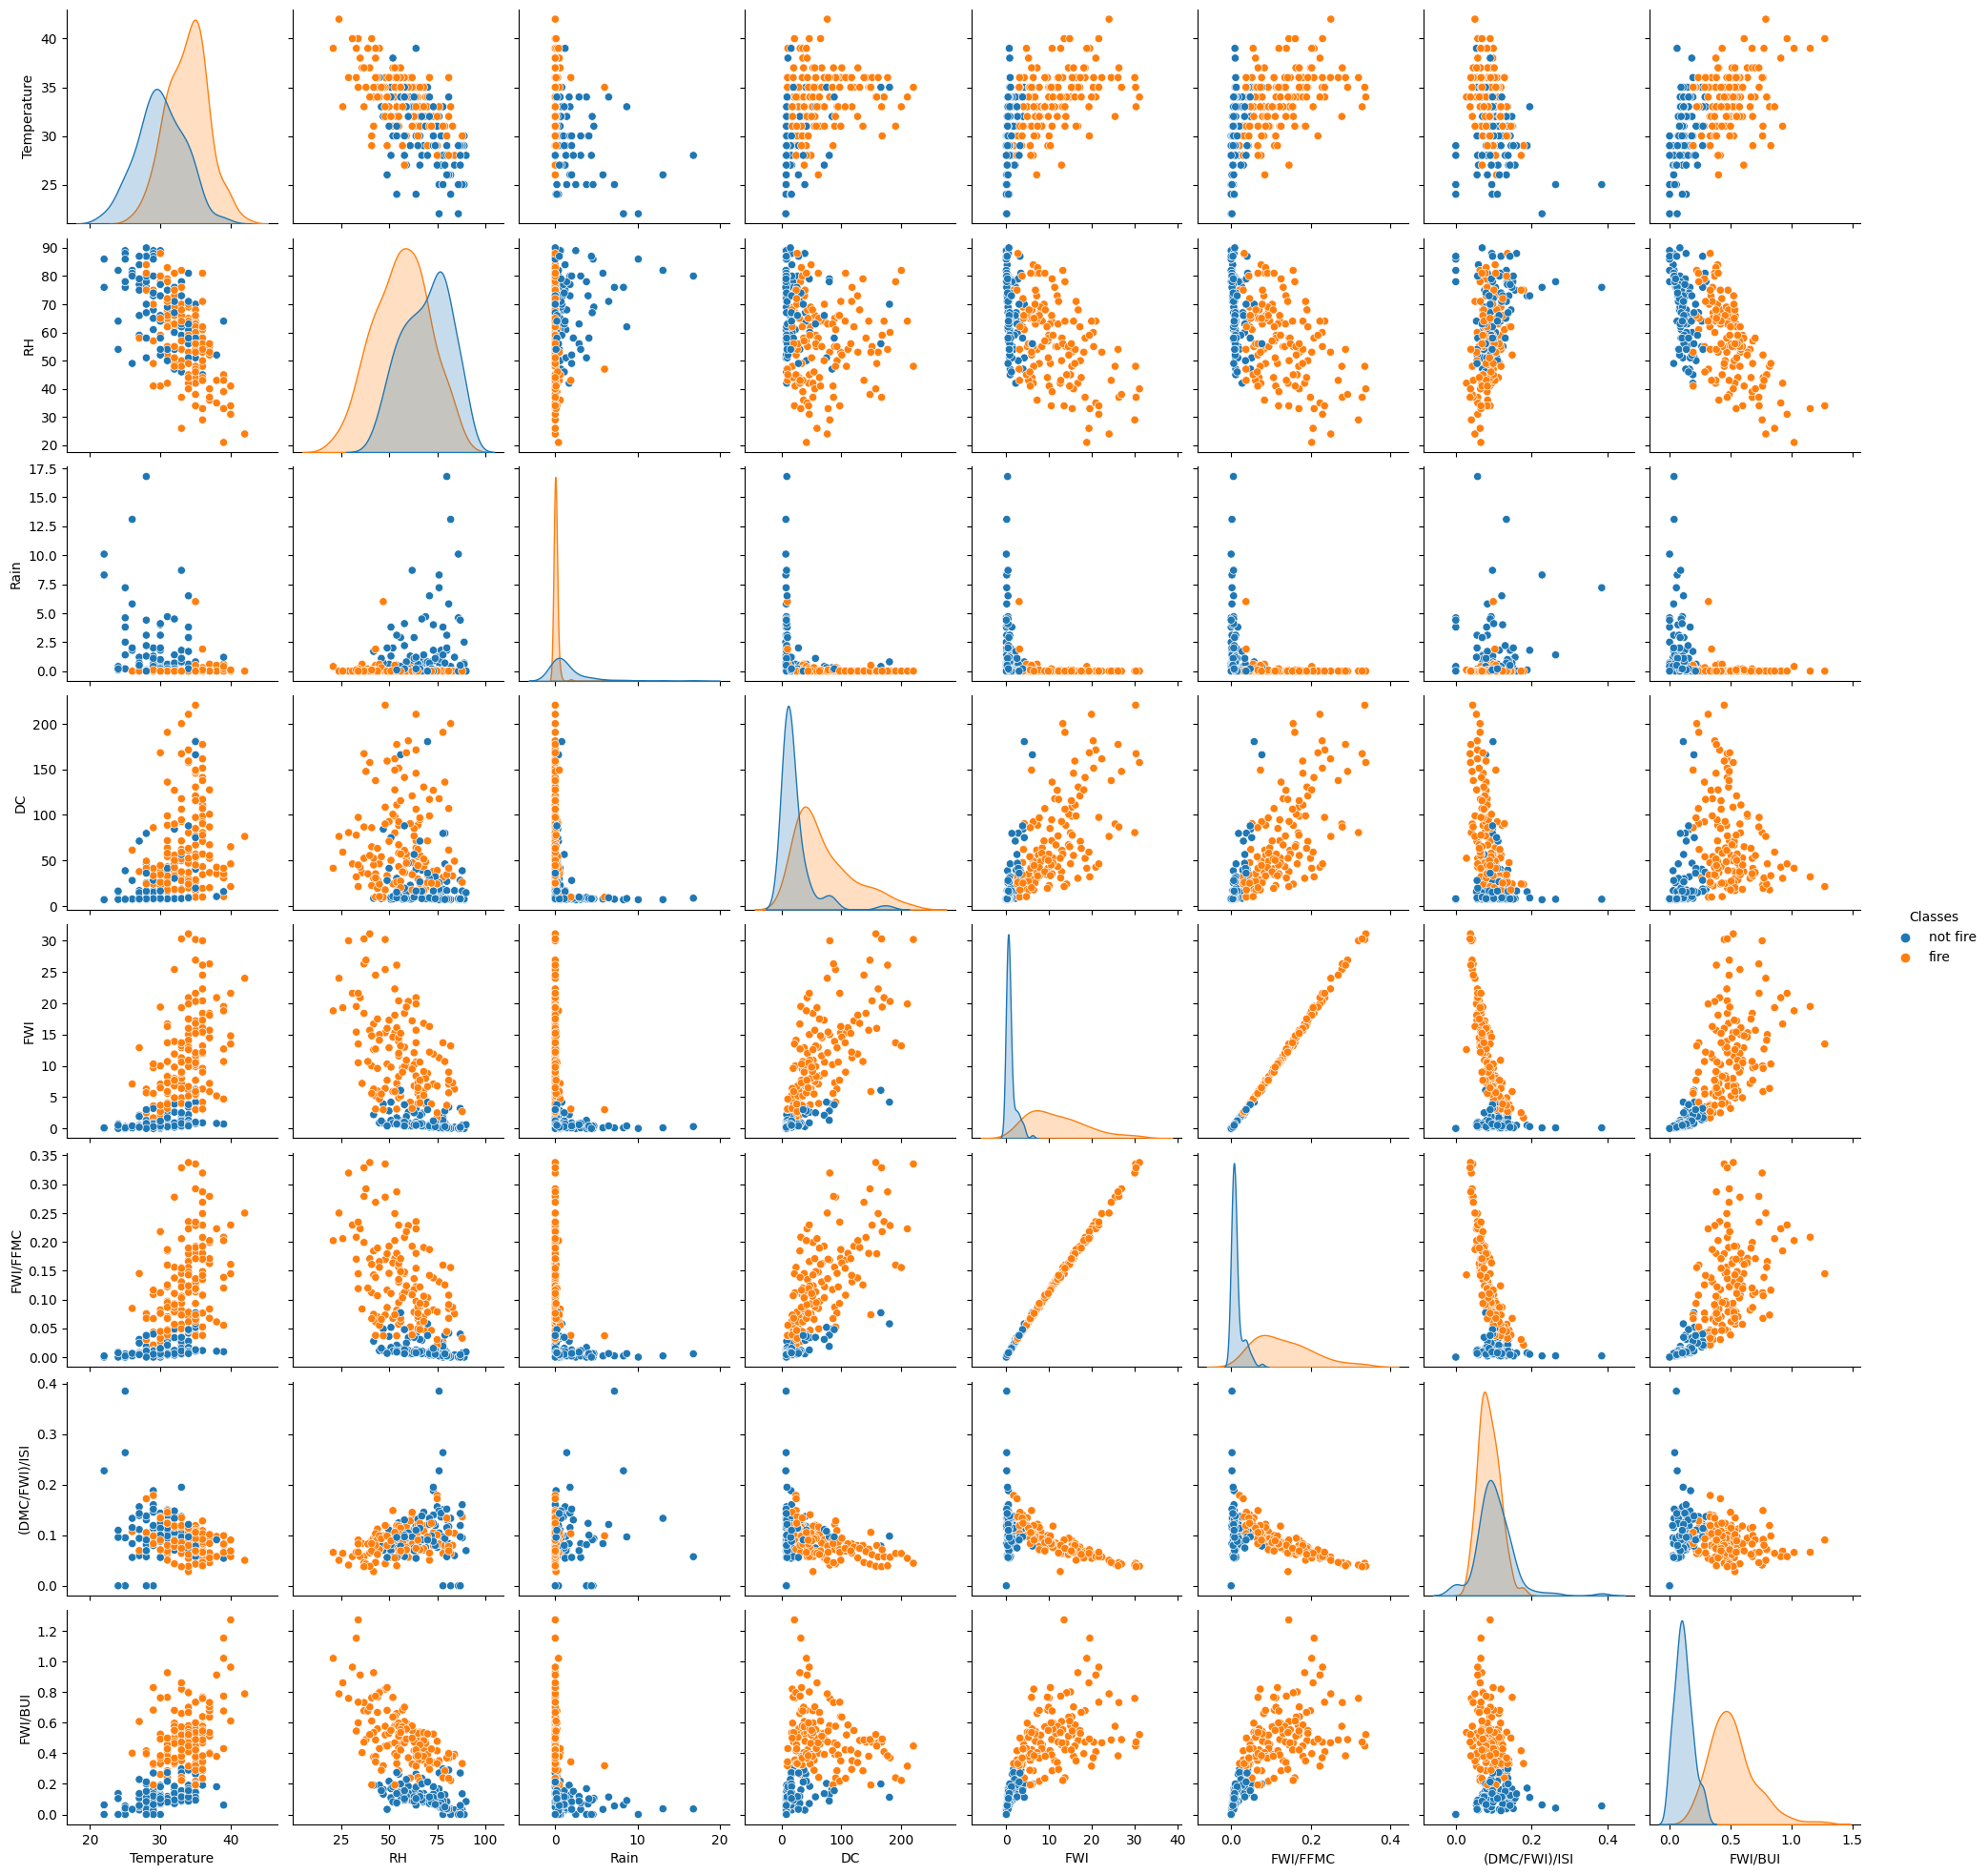

In [43]:
sns.pairplot(df_feature.drop(['Ws','day','year','BUI','ISI','FFMC','DMC','month'],axis=1),hue='Classes')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe
#df = pd.concat([X_train_scaled_final,X_test_scaled_final],axis=0).drop(['month_07','month_08','month_09'],axis=1)

df = df_feature.drop(['Ws','day','year','BUI','ISI','FFMC','DMC','Classes','month'],axis=1)

# create figure and axes objects
fig, axes = plt.subplots(nrows=3, ncols=3, squeeze=True,figsize=(12, 9))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for Selected Standardized Columns', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()




# Generating New Data

### Outliers Detection in New Data

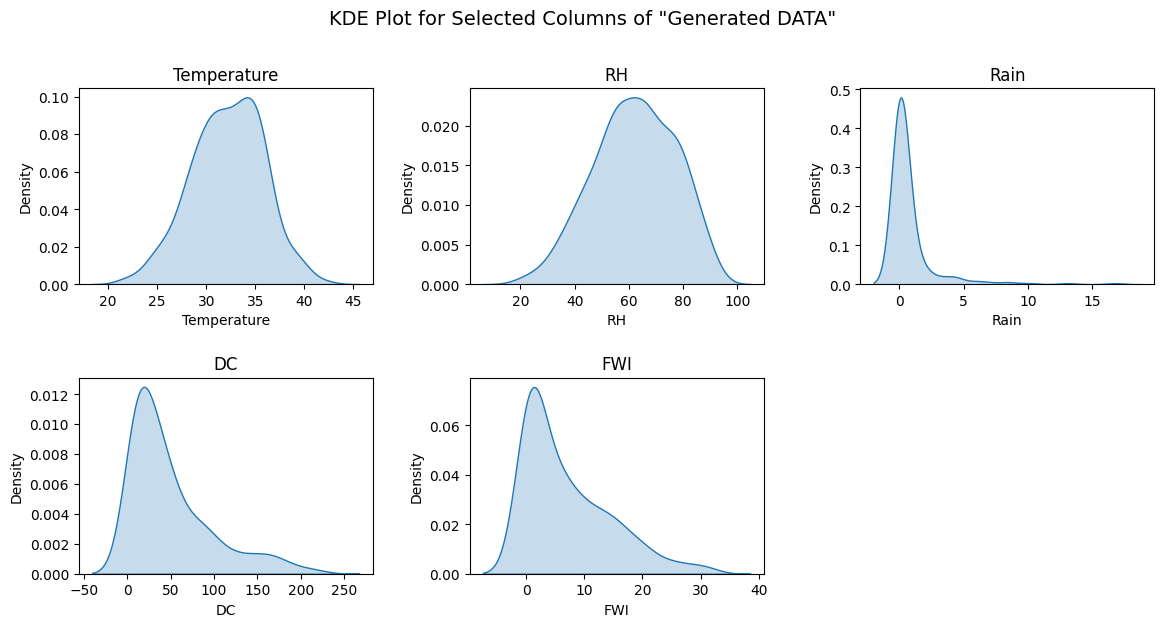

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe

#df = pd.concat([X_train,X_test],axis=0).drop(['month_07','month_08','month_09'],axis=1)
df = df_combined_selected.drop(['month','Classes'],axis=1)

# create figure and axes objects
fig, axes = plt.subplots(nrows=3, ncols=3, squeeze=True,figsize=(12, 9))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for Selected Columns of "Generated DATA"', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()




# Feature scaling and Train Test Split

In [45]:
#df_combined = df_combined_selected

df_combined_selected = df_feature.drop(['Ws','day','year','BUI','ISI','FFMC','DMC'],axis=1)

#df_combined_selected = df_combined_selected.copy()
df_combined_selected.head(3)
#df_combined_selected.head(2)

month  Temperature  RH  Rain   DC  FWI   Classes  FWI/FFMC  (DMC/FWI)/ISI  \
0    06           29  57   0.0  7.6  0.5  not fire  0.007610       0.113122   
1    06           29  61   1.3  7.6  0.4  not fire  0.006211       0.097561   
2    06           26  82  13.1  7.1  0.1  not fire  0.002123       0.133333   

    FWI/BUI  
0  0.147059  
1  0.102564  
2  0.037037

In [46]:
df_combined_selected.head()

month  Temperature  RH  Rain    DC  FWI   Classes  FWI/FFMC  (DMC/FWI)/ISI  \
0    06           29  57   0.0   7.6  0.5  not fire  0.007610       0.113122   
1    06           29  61   1.3   7.6  0.4  not fire  0.006211       0.097561   
2    06           26  82  13.1   7.1  0.1  not fire  0.002123       0.133333   
3    06           25  89   2.5   6.9  0.0  not fire  0.000000            NaN   
4    06           27  77   0.0  14.2  0.5  not fire  0.007716       0.138889   

    FWI/BUI  
0  0.147059  
1  0.102564  
2  0.037037  
3  0.000000  
4  0.128205

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [48]:
df_combined_encoded = pd.get_dummies(df_combined_selected,drop_first=True)   # 0: FIRE and 1: NOT FIRE
df_combined_encoded.head(3)

Temperature  RH  Rain   DC  FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  \
0           29  57   0.0  7.6  0.5  0.007610       0.113122  0.147059   
1           29  61   1.3  7.6  0.4  0.006211       0.097561  0.102564   
2           26  82  13.1  7.1  0.1  0.002123       0.133333  0.037037   

   month_07  month_08  month_09  Classes_not fire  
0         0         0         0                 1  
1         0         0         0                 1  
2         0         0         0                 1

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_encoded.drop(['Classes_not fire'],axis=1), df_combined_encoded[['Classes_not fire']], test_size=0.2,random_state=100)


In [50]:
#df_combined_encoded['Classes'].value_counts(normalize=True)

In [51]:
X_train_dropped = X_train.drop(['month_07','month_08','month_09'],axis=1)
X_test_dropped = X_test.drop(['month_07','month_08','month_09'],axis=1)

In [52]:
X_train_dropped.head()

Temperature  RH  Rain    DC   FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI
29            33  50   0.0  92.8  12.9  0.145434       0.078239  0.455830
42            34  81   0.0  37.2   3.4  0.041565       0.116838  0.290598
115           29  65   0.6  15.2   0.7  0.010249       0.084848  0.120690
168           34  45   0.0  24.1  14.1  0.155801       0.071865  0.796610
224           30  80   0.0  34.5   3.7  0.044525       0.133816  0.370000

## Normalization

In [53]:
fitted_scaler = StandardScaler().fit(X_train_dropped)


#fitted_scaler = Normalizer().fit(X_train_dropped)


X_train_scaled = fitted_scaler.transform(X_train_dropped)
X_test_scaled = fitted_scaler.transform(X_test_dropped)

In [54]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.drop(['month_07','month_08','month_09'],axis=1,).columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.drop(['month_07','month_08','month_09'],axis=1).columns)

In [55]:
X_train_scaled_final  = pd.concat([X_train[['month_07','month_08','month_09']].reset_index(drop=True), X_train_scaled_df],axis=1)
X_test_scaled_final  = pd.concat([X_test[['month_07','month_08','month_09']].reset_index(drop=True), X_test_scaled_df],axis=1)

In [56]:
X_train_scaled_final.head(3)


month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         0         0     0.266381 -0.821244 -0.381541  0.984429   
1         1         0         0     0.539809  1.254823 -0.381541 -0.242187   
2         0         0         1    -0.827331  0.183304 -0.104489 -0.727538   

        FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  
0  0.772938  0.795832      -0.379876  0.477521  
1 -0.480053 -0.465379       0.551357 -0.174961  
2 -0.836166 -0.845626      -0.220413 -0.845911

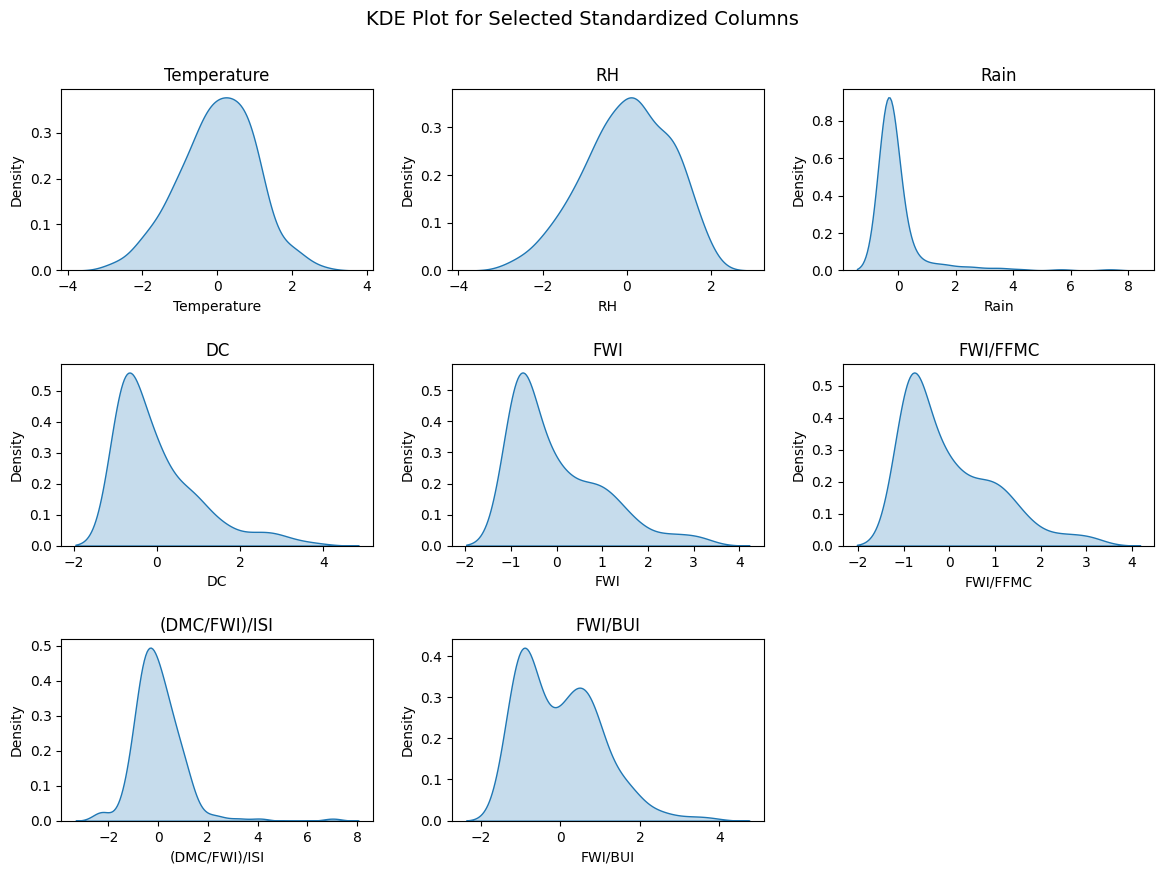

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe
#df = pd.concat([X_train_scaled_final,X_test_scaled_final],axis=0).drop(['month_07','month_08','month_09'],axis=1)

df = X_train_scaled_final.drop(['month_07','month_08','month_09'],axis=1)

# create figure and axes objects
fig, axes = plt.subplots(nrows=3, ncols=3, squeeze=True,figsize=(12, 9))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for Selected Standardized Columns', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()

#####################################################################
#fig.figure.savefig('../AutoViz_Plots/10_2.svg',transparent=True)


In [58]:
from scipy.stats import boxcox

################# raw3_trans is with np.log(x + 0.001001)
################# regenrated3 is with log(x + 1)

X_train_scaled_final['log_skewed_FWI'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_train_scaled_final['FWI']])
X_test_scaled_final['log_skewed_FWI'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_test_scaled_final['FWI']])


#X_train_scaled_final['sq_FWI'] = pd.Series([x**2 if x > 0 else 0 for x in X_train_scaled_final['FWI']])
#X_test_scaled_final['sq_FWI'] = pd.Series([x**2 if x > 0 else 0 for x in X_test_scaled_final['FWI']])



X_train_scaled_final['log_FWI/FFMC'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_train_scaled_final['FWI/FFMC']])
X_test_scaled_final['log_FWI/FFMC'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_test_scaled_final['FWI/FFMC']])











#X_train_scaled_final['sq_DC'] = pd.Series([x**2 if x > 0 else 0 for x in X_train_scaled_final['DC']])
#X_test_scaled_final['sq_DC'] = pd.Series([x**2 if x > 0 else 0 for x in X_train_scaled_final['DC']])

X_train_scaled_final['log_skewed_DC'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_train_scaled_final['DC']])
X_test_scaled_final['log_skewed_DC'] = pd.Series([np.log(x + 0.5) if x > 0 else 0 for x in X_train_scaled_final['DC']])


#X_test_scaled_final['log_skewed_FFMC'] = pd.Series([np.reciprocal(x) if x > 0 else 0 for x in X_test_scaled_final['FFMC']])

In [59]:
X_train_scaled_final.head()

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         0         0     0.266381 -0.821244 -0.381541  0.984429   
1         1         0         0     0.539809  1.254823 -0.381541 -0.242187   
2         0         0         1    -0.827331  0.183304 -0.104489 -0.727538   
3         1         0         0     0.539809 -1.156094 -0.381541 -0.531191   
4         0         0         1    -0.553903  1.187853 -0.381541 -0.301753   

        FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  log_skewed_FWI  log_FWI/FFMC  \
0  0.772938  0.795832      -0.379876  0.477521        0.241328      0.259153   
1 -0.480053 -0.465379       0.551357 -0.174961        0.000000      0.000000   
2 -0.836166 -0.845626      -0.220413 -0.845911        0.000000      0.000000   
3  0.931211  0.921712      -0.533633  1.823222        0.358521      0.351862   
4 -0.440485 -0.429440       0.960935  0.138587        0.000000      0.000000   

   log_skewed_DC  
0        0.39503  
1        0.00000  
2        0.00000  
3        0.00000  
4        0.00000

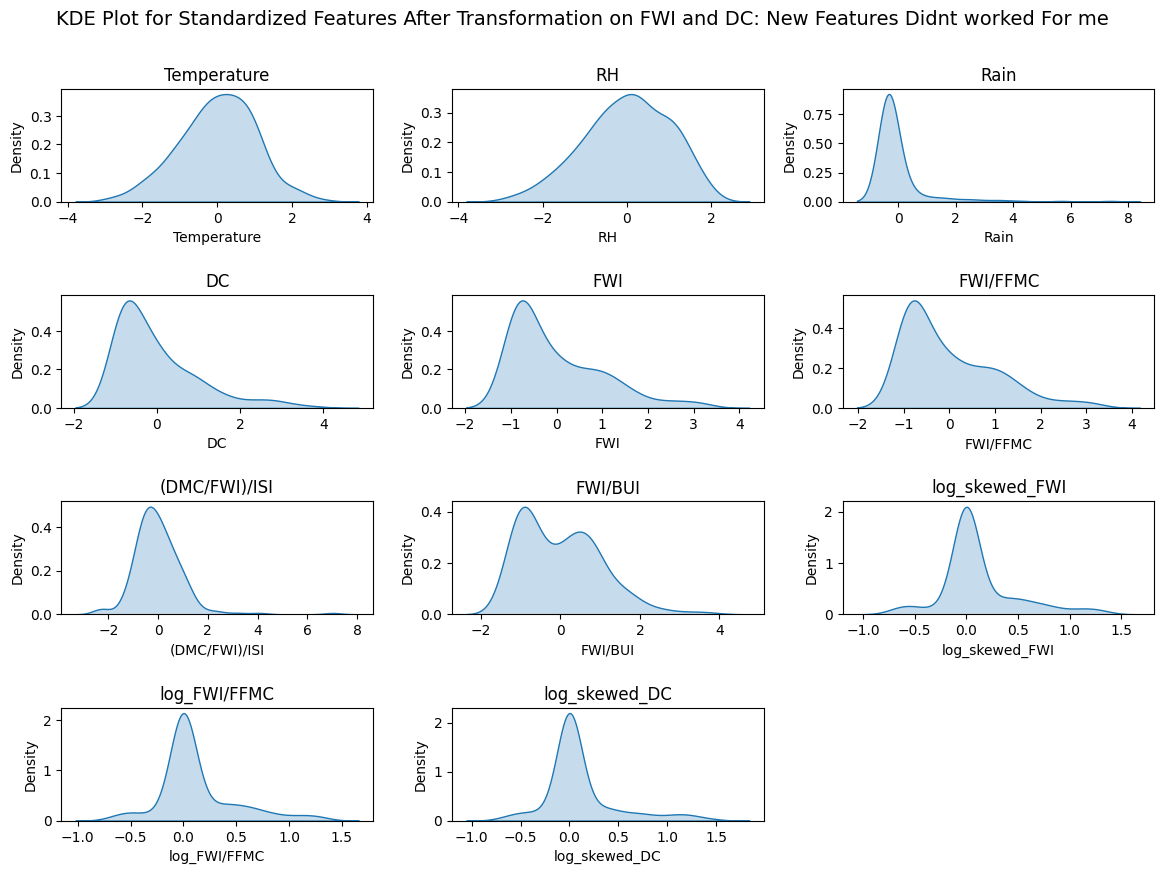

In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# generate a sample dataframe
#df = pd.concat([X_train_scaled_final,X_test_scaled_final],axis=0).drop(['month_07','month_08','month_09'],axis=1)

df = X_train_scaled_final.drop(['month_07','month_08','month_09'],axis=1)

# create figure and axes objects
fig, axes = plt.subplots(nrows=4, ncols=3, squeeze=True,figsize=(12, 9))

# flatten the axes array for easy indexing
axes = axes.flatten()

# loop through each column and plot the kde on a separate axis
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)

# remove any unused axes and add a main title
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
fig.suptitle('KDE Plot for Standardized Features After Transformation on FWI, DC,FWI/FFMC', fontsize=14)

# adjust the spacing between the subplots and show the figure
fig.tight_layout(pad=2)
plt.show()

####################
fig.figure.savefig('../AutoViz_Plots/11_raw4_trans.svg',transparent=True,)


In [61]:
X_train_scaled_final.head()

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         0         0     0.266381 -0.821244 -0.381541  0.984429   
1         1         0         0     0.539809  1.254823 -0.381541 -0.242187   
2         0         0         1    -0.827331  0.183304 -0.104489 -0.727538   
3         1         0         0     0.539809 -1.156094 -0.381541 -0.531191   
4         0         0         1    -0.553903  1.187853 -0.381541 -0.301753   

        FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  log_skewed_FWI  log_FWI/FFMC  \
0  0.772938  0.795832      -0.379876  0.477521        0.241328      0.259153   
1 -0.480053 -0.465379       0.551357 -0.174961        0.000000      0.000000   
2 -0.836166 -0.845626      -0.220413 -0.845911        0.000000      0.000000   
3  0.931211  0.921712      -0.533633  1.823222        0.358521      0.351862   
4 -0.440485 -0.429440       0.960935  0.138587        0.000000      0.000000   

   log_skewed_DC  
0        0.39503  
1        0.00000  
2        0.00000  
3        0.00000  
4        0.00000

In [62]:
X_test_scaled_final.head()

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         1         0     0.539809  0.183304 -0.381541 -0.407647   
1         1         0         0    -0.280475  1.120883 -0.381541  1.937482   
2         0         1         0     1.906949 -1.557913 -0.289191 -0.281897   
3         0         0         1    -1.100759  1.455733 -0.381541  0.024757   
4         0         0         1    -0.280475 -0.486395 -0.381541  0.214485   

        FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  log_skewed_FWI  log_FWI/FFMC  \
0 -0.123939 -0.116753       0.282218  0.772126        0.000000      0.000000   
1  0.482772  0.551271      -0.340266 -0.192739       -0.017378      0.050000   
2  0.482772  0.484829      -0.274967  1.351745       -0.017378     -0.015287   
3 -0.097561 -0.057226       0.234476  0.232373        0.000000      0.000000   
4  0.166227  0.177777      -0.020045  0.384570       -0.406125     -0.388937   

   log_skewed_DC  
0        0.39503  
1        0.00000  
2        0.00000  
3        0.00000  
4        0.00000

In [63]:
y_train.head()


Classes_not fire
29                  0
42                  1
115                 1
168                 0
224                 0

In [64]:
train = pd.concat([X_train_scaled_final,y_train.reset_index(drop=True)],axis=1)
train

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0           0         0         0     0.266381 -0.821244 -0.381541  0.984429   
1           1         0         0     0.539809  1.254823 -0.381541 -0.242187   
2           0         0         1    -0.827331  0.183304 -0.104489 -0.727538   
3           1         0         0     0.539809 -1.156094 -0.381541 -0.531191   
4           0         0         1    -0.553903  1.187853 -0.381541 -0.301753   
..        ...       ...       ...          ...       ...       ...       ...   
189         0         1         0     0.266381  1.321793 -0.381541  3.353826   
190         0         0         1    -0.827331  1.723612 -0.381541 -0.696652   
191         0         1         0    -0.007047  0.451184 -0.381541  0.009314   
192         0         0         0    -0.280475  0.116334 -0.381541  0.344647   
193         0         0         0    -1.921043  1.723612 -0.289191 -0.206888   

          FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  log_skewed_FWI  \
0    0.772938  0.795832      -0.379876  0.477521        0.241328   
1   -0.480053 -0.465379       0.551357 -0.174961        0.000000   
2   -0.836166 -0.845626      -0.220413 -0.845911        0.000000   
3    0.931211  0.921712      -0.533633  1.823222        0.358521   
4   -0.440485 -0.429440       0.960935  0.138587        0.000000   
..        ...       ...            ...       ...             ...   
189  0.812507  0.917777      -0.727497 -0.443491        0.271939   
190 -0.862545 -0.884562       1.598830 -0.788867        0.000000   
191  0.126659  0.152916      -0.003450  0.514190       -0.467353   
192  0.179416  0.206345       0.236331  0.490103       -0.386521   
193 -0.888923 -0.901212       0.022969 -1.209675        0.000000   

     log_FWI/FFMC  log_skewed_DC  Classes_not fire  
0        0.259153       0.395030                 0  
1        0.000000       0.000000                 1  
2        0.000000       0.000000                 1  
3        0.351862       0.000000                 0  
4        0.000000       0.000000                 0  
..            ...            ...               ...  
189      0.349090       1.349066                 0  
190      0.000000       0.000000                 1  
191     -0.426307      -0.674691                 0  
192     -0.347651      -0.168836                 0  
193      0.000000       0.000000                 1  

[194 rows x 15 columns]

In [65]:
train = pd.concat([X_train_scaled_final,y_train.reset_index(drop=True)],axis=1)
#train.to_csv('../DataSet/train.csv',index=False)



train.to_csv('../DataSet/train_raw4_trans.csv',index=False)

In [66]:
test = pd.concat([X_test_scaled_final,y_test.reset_index(drop=True)],axis=1)
#test.to_csv('../DataSet/test.csv',index=False)



test.to_csv('../DataSet/test_raw4_trans.csv',index=False)

In [63]:
train.head()

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         0         0     0.266381 -0.821244 -0.381541  0.984429   
1         1         0         0     0.539809  1.254823 -0.381541 -0.242187   
2         0         0         1    -0.827331  0.183304 -0.104489 -0.727538   
3         1         0         0     0.539809 -1.156094 -0.381541 -0.531191   
4         0         0         1    -0.553903  1.187853 -0.381541 -0.301753   

        FWI  log_skewed_FWI  log_skewed_DC  Classes_not fire  
0  0.772938        0.241328        0.39503                 0  
1 -0.480053        0.000000        0.00000                 1  
2 -0.836166        0.000000        0.00000                 1  
3  0.931211        0.358521        0.00000                 0  
4 -0.440485        0.000000        0.00000                 0

In [70]:
test.head()

month_07  month_08  month_09  Temperature        RH      Rain        DC  \
0         0         1         0     0.539809  0.183304 -0.381541 -0.407647   
1         1         0         0    -0.280475  1.120883 -0.381541  1.937482   
2         0         1         0     1.906949 -1.557913 -0.289191 -0.281897   
3         0         0         1    -1.100759  1.455733 -0.381541  0.024757   
4         0         0         1    -0.280475 -0.486395 -0.381541  0.214485   

        FWI  FWI/FFMC  (DMC/FWI)/ISI   FWI/BUI  log_skewed_FWI  log_FWI/FFMC  \
0 -0.123939 -0.116753       0.307763  0.772126        0.000000      0.000000   
1  0.482772  0.551271      -0.296047 -0.192739       -0.017378      0.050000   
2  0.482772  0.484829      -0.232707  1.351745       -0.017378     -0.015287   
3 -0.097561 -0.057226       0.261453  0.232373        0.000000      0.000000   
4  0.166227  0.177777       0.014567  0.384570       -0.406125     -0.388937   

   log_skewed_DC  Classes_not fire  
0        0.39503                 0  
1        0.00000                 0  
2        0.00000                 0  
3        0.00000                 0  
4        0.00000                 0

In [71]:
train.shape

(194, 15)

# _____________________________________